## Homework #9 - Support Vector Machine (SVM)

### Overview:
Support Vector Machines (SVMs) is one of the most powerful machine learning models. On small
amounts of data, it may even outperform Neural Networks. So let’s explore what
its power consists of.

### Task:
For this chapter, you will have to do the following:
* Import the Data Set.
* Firstly, we will explore how the feature scale influences the algorithm’s performance. Train an SVM model on 4 versions of the Data
Set:
    * Initial one.
    * The one passed through the StandardScaler.
    * The one passed through the MinMaxScaler.
    * The one passed through the MaxAbsScaler.

Create the following table in pandas and compare the results. Comment
them:

<div align="center">

| **Initial** | **standard_scaler** | **min_max_scaler** | **max_abs_scaler** |
|:-----------:|:-------------------:|:------------------:|:------------------:|
|             |                     |                    |                    |
|             |                     |                    |                    |

</div>

* Usually, SVMs use some Kernel to move the data to another space
where linear planes separate the classes. In this task, you will have to
explore how different kernels influence the decision boundary. Create the
plots of decision boundary for the following kernels:
    * linear
    * poly
    * rbf
    * sigmoid

Plot them all together in a combined plot, compare them, and express
some conclusions.


In [352]:
from enum import Enum
import time
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.svm import LinearSVC

I decided to use a dataset regarding Wine Quality.

In [353]:
wine_dataset: pd.DataFrame = pd.read_csv("dataset/wine-quality-white-and-red.csv")

In [354]:
wine_dataset.head(n=10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [355]:
wine_dataset.tail(n=10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6487,red,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
6488,red,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
6489,red,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
6490,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [356]:
wine_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [357]:
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [358]:
wine_dataset['type'].unique()

array(['white', 'red'], dtype=object)

In [359]:
X_features = wine_dataset.drop(columns=['type'], axis=1)
X_features

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [360]:
y_target = wine_dataset['type']
y_target

0       white
1       white
2       white
3       white
4       white
        ...  
6492      red
6493      red
6494      red
6495      red
6496      red
Name: type, Length: 6497, dtype: object

In [361]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=.2, random_state=42)

In [362]:
X_features.shape

(6497, 12)

In [363]:
X_train.shape

(5197, 12)

In [364]:
X_test.shape

(1300, 12)

In [365]:
labelEncoder = LabelEncoder()

In [366]:
y_train = pd.Series(data=labelEncoder.fit_transform(y=y_train), name='type', index=y_train.index)
y_test = pd.Series(data=labelEncoder.transform(y=y_test), name='type', index=y_test.index)

In [367]:
y_train

1916    1
947     1
877     1
2927    1
6063    0
       ..
3772    1
5191    0
5226    0
5390    0
860     1
Name: type, Length: 5197, dtype: int64

In [368]:
y_test

3103    1
1419    1
4761    1
4690    1
4032    1
       ..
889     1
2850    1
4917    0
5198    0
5643    0
Name: type, Length: 1300, dtype: int64

Now that I converted the target column into numerical values, I can use this sets in order to train all the mentioned above SVM implementations. There are mainly 3 ways to implement
SVM. By definition, Support Vector Machine task is to maximize the space of the margin region, i.e., it draws a decision boundary, similar to Logistic Regression model, but different
as concept. It uses Support Vectors, that are basically the vectors perpendicular to the decision boundary (Hyperplane) defined by the equation:
$$
\vec{w}\cdot\vec{x} - b = 0
$$
that are pointed to the points of the dataset that are placed exactly on the:
$$
\begin{gather*}
\vec{w}\cdot\vec{x} - b = 1 \\
\vec{w}\cdot\vec{x} - b = -1
\end{gather*}
$$
Then, if $\vec{x}$ is on the Decision Boundary, therefore it must follow the equation for that hyperplane:
$$
\vec{w}\cdot\vec{x} - b = 0 \implies \vec{w} \cdot (\vec{x} + k\frac{\vec{w}}{||\vec{w}||}) - b = 1
$$
which means that, in order to achieve the position on the support vector, $k$ units in the direction of $\vec{w}$ are needed to be passed.
$$
\begin{gather*}
\vec{w}\cdot\vec{x} - b = 0 \\
\vec{w} \cdot (\vec{x} + k\frac{\vec{w}}{||\vec{w}||}) - b = k\frac{\vec{w}\vec{w}}{||\vec{w}||} = 1 \implies k = \frac{1}{||\vec{w}||}
\end{gather*}
$$
In this way, SVM task is to maximize the margin space, which is defined by the $\frac{2}{||\vec{2}||}$, which mathematically is described by:
$$
\begin{gather*}
\max_{\vec{w}, b} \left( margin \right) \implies \max_{\vec{w}, b} \left( \frac{1}{||\vec{w}||} \right) \text{ - which is the distance from the decision boundary to the support vectors}
\implies \min_{\vec{w}, b} \left( ||\vec{w}|| \right) \\
\text{So that } y_i(\vec{w}\cdot\vec{x_i} - b) \ge 1 \text{ }\forall \text{ } i = 1, 2,..., N
\end{gather*}
$$
This is the first implementation of the SVM, called Primal problem.

There is also another implementation/solution of the SVM problem - Dual, using Lagrange multipliers, that optimizes the solution of the SVM implementation.
$$
\begin{gather*}
\min_{\alpha_i \ge 0} \left( \frac{1}{2}\sum_{\text{pairs of SV}} \alpha_i \alpha_j y_i y_j x_i^T x_j -  \sum_{\text{pairs of SV}} \alpha_i \right) \\
\text{where } \alpha \text{ - lagrange multipliers}
\end{gather*}
$$
which actually just needs the dot product of the features, and will serve an approach to the Kernel implementation of SVM.

Kernel functions transforms non-linear relationships into a linear format, making them accessible for algorithms that traditionally only handle linear data. In other words, if
features does not provide a linear decision boundary which is required for the SVM, it will not be able to build a decision boundary between the points. In order to do that, the points are required to be transformed to a higher dimension, which will give a possibility using a hyperplane to separate them. Kernel functions are functions of the dot product of the features, and they are used, because they make this process easier, by not enabling us to manually convert the data points to another dimension, but by computing the higher dimension projections of the original data points.

In [369]:
table = pd.DataFrame(data=[], columns=['Initial', 'standard_scaler', 'min_max_scaler', 'max_abs_scaler'])
table

,Initial,standard_scaler,min_max_scaler,max_abs_scaler


In [370]:
table_time = pd.DataFrame(data=[], columns=['Initial', 'standard_scaler', 'min_max_scaler', 'max_abs_scaler'])
table_time

,Initial,standard_scaler,min_max_scaler,max_abs_scaler


In [371]:
scaler_dict = {
    "Initial": None,
    "standard_scaler": StandardScaler(),
    "min_max_scaler": MinMaxScaler(),
    "max_abs_scaler": MaxAbsScaler(),
}

In [372]:
class ScalerEnum(Enum):
    INITIAL = "Initial"
    STANDARD_SCALER = "standard_scaler"
    MIN_MAX_SCALER = "min_max_scaler"
    MAX_ABS_SCALER = "max_abs_scaler"

In [373]:
dual_problem_choices = [False, True]
dual_problem_choices

[False, True]

In [374]:
for is_dual_choice in dual_problem_choices:
    accuracy_scores = {}
    time_elapsed = {}
    for scaler_name, scaler in scaler_dict.items():
        if scaler is not None:
            X_train_scaled = scaler.fit_transform(X=X_train)
            X_test_scaled = scaler.transform(X=X_test)
        else:
            X_train_scaled = X_train
            X_test_scaled = X_test

        svm = LinearSVC(dual=is_dual_choice)
        tic = time.perf_counter()
        svm.fit(X_train_scaled, y_train)
        toc = time.perf_counter()
        accuracy_score = svm.score(X=X_test_scaled, y=y_test)
        accuracy_scores[scaler_name] = accuracy_score
        time_elapsed[scaler_name] = toc - tic
    table.loc[f'is_dual={is_dual_choice}'] = pd.Series(accuracy_scores)
    table_time.loc[f'is_dual={is_dual_choice}'] = pd.Series(time_elapsed)
table

D:\Programming\Projects\Sigmoid\.venv\Lib\site-packages\sklearn\svm\_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Programming\Projects\Sigmoid\.venv\Lib\site-packages\sklearn\svm\_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,Initial,standard_scaler,min_max_scaler,max_abs_scaler
is_dual=False,0.984615,0.993077,0.986923,0.981538
is_dual=True,0.975385,0.993077,0.986923,0.981538


As a result, I obtained that for the unscaled version of the dataset, the implementation of the basic algorithm of SVM performs slightly better than the Dual solution implementation, which I may identify as a result of the implementation itself. In documentation of sklearn, is mentioned that `is_dual=False` is preferred when `num_samples > num_features`, which is the case that I have. In the rest of the cases, the results are similar. The only difference I may suggest that is being between those two implementations is that of space optimization.

In [375]:
table_time

,Initial,standard_scaler,min_max_scaler,max_abs_scaler
is_dual=False,0.016653,0.004876,0.003715,0.003784
is_dual=True,0.103294,0.019469,0.004746,0.006657


Next, I will implement several Kernel functions and plot the SVM decision boundaries implementing those kernel function. For this, I will select 2 features that have the most impact on the target value.

In [376]:
train_wine_dataset = pd.concat([X_train, y_train], axis=1)
test_wine_dataset = pd.concat([X_test, y_test], axis=1)

In [377]:
original_wine_dataset = pd.concat([train_wine_dataset, test_wine_dataset], axis=0).sort_index()
original_wine_dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [378]:
corr_matrix = original_wine_dataset.corr()

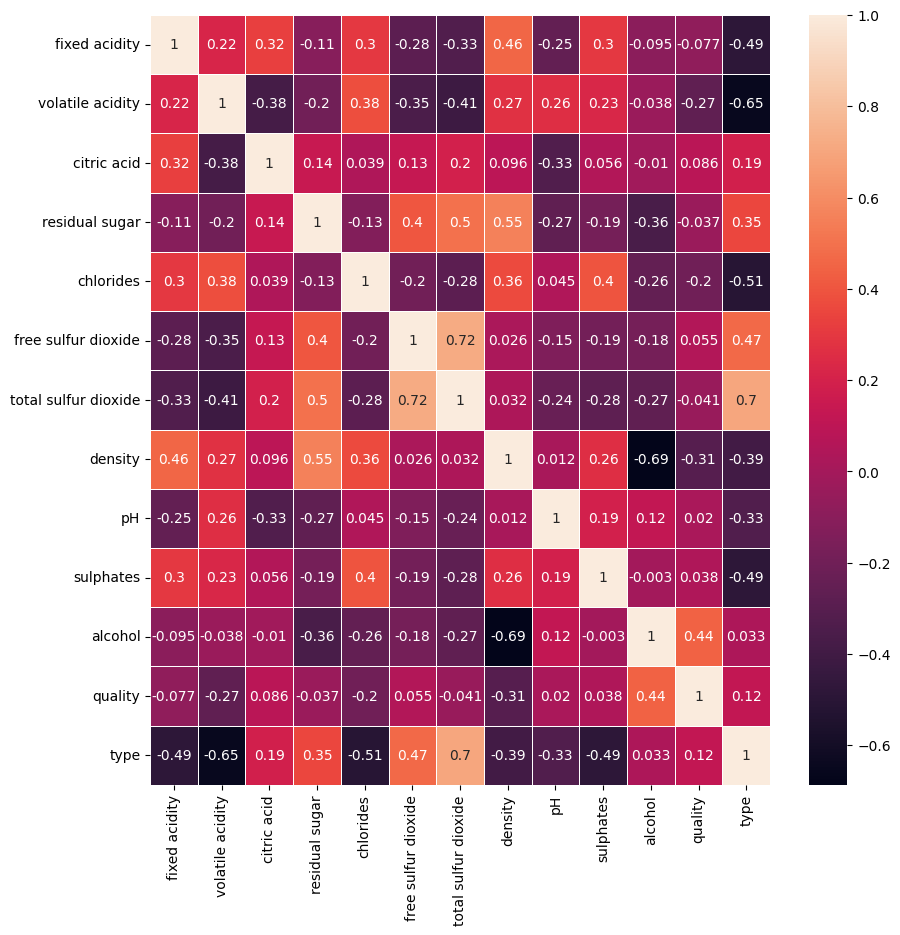

In [380]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=corr_matrix, annot=True, linewidths=0.5, cbar=True)
plt.show()

In [383]:
original_wine_dataset.corr()['type'].abs().sort_values(ascending=False)

type                    1.000000
total sulfur dioxide    0.700357
volatile acidity        0.653036
chlorides               0.512678
sulphates               0.487218
fixed acidity           0.486740
free sulfur dioxide     0.471644
density                 0.390645
residual sugar          0.348821
pH                      0.329129
citric acid             0.187397
quality                 0.119323
alcohol                 0.032970
Name: type, dtype: float64

In [385]:
selected_features_names = ['total sulfur dioxide', 'volatile acidity']
selected_features = original_wine_dataset[selected_features_names]
selected_features

,total sulfur dioxide,volatile acidity
0,170.0,0.270
1,132.0,0.300
2,97.0,0.280
3,186.0,0.230
4,186.0,0.230
...,...,...
6492,44.0,0.600
6493,51.0,0.550
6494,40.0,0.510
6495,44.0,0.645


In [386]:
X_train, X_test, y_train, y_test = train_test_split(selected_features, y_target, test_size=.2, random_state=42)

In [404]:
y_train

1916    white
947     white
877     white
2927    white
6063      red
        ...  
3772    white
5191      red
5226      red
5390      red
860     white
Name: type, Length: 5197, dtype: object

In [388]:
standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X=X_train)
X_test_scaled = standard_scaler.transform(X=X_test)

In [405]:
labelEncoder = LabelEncoder()
y_train = pd.Series(data=labelEncoder.fit_transform(y=y_train), name='type', index=y_train.index)
y_test = pd.Series(data=labelEncoder.transform(y=y_test), name='type', index=y_test.index)

In [418]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay


def plot_training_data_with_decision_boundary(
    kernel, ax=None, long_title=True, support_vectors=True, X=None, y=None
):

    X = np.array(X)
    y = np.array(y)

    clf = SVC(kernel=kernel, gamma=2).fit(X, y)

    if ax is None:
        _, ax = plt.subplots(figsize=(8, 6))
    x_min, x_max, y_min, y_max = -3, 3, -3, 3
    ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

    common_params = {"estimator": clf, "X": X, "ax": ax}
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.3,
    )
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="decision_function",
        plot_method="contour",
        levels=[-1, 0, 1],
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
    )

    if support_vectors:
        ax.scatter(
            clf.support_vectors_[:, 0],
            clf.support_vectors_[:, 1],
            s=150,
            facecolors="none",
            edgecolors="k",
        )

    scatter_obj = ax.scatter(X[:, 0], X[:, 1], c=np.array(y, dtype=np.float64), s=30, edgecolors="k")
    legend_elements = scatter_obj.legend_elements()[0]
    ax.legend(legend_elements, np.unique(y), loc="upper right", title="Classes")
    accuracy_score = clf.score(X_test_scaled, y_test)
    title = f"Decision boundaries of {kernel} kernel in SVC - accuracy {accuracy_score}" if long_title else kernel
    ax.set_title(title)

    if ax is None:
        plt.show()


In [419]:
kernel_functions = ['linear', 'poly',  'rbf', 'sigmoid']

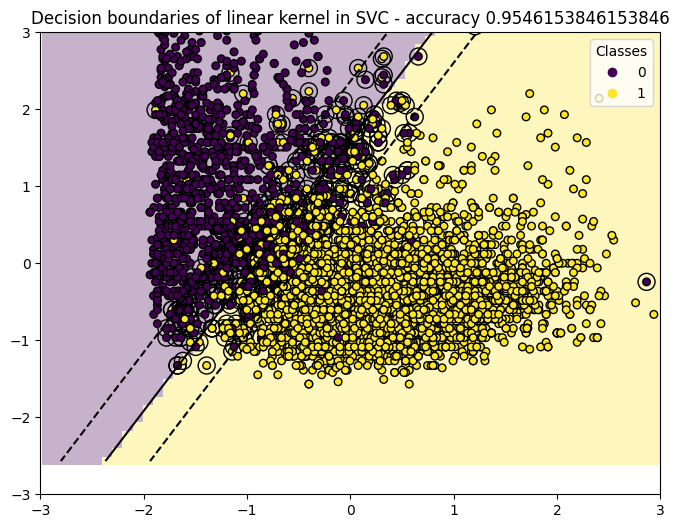

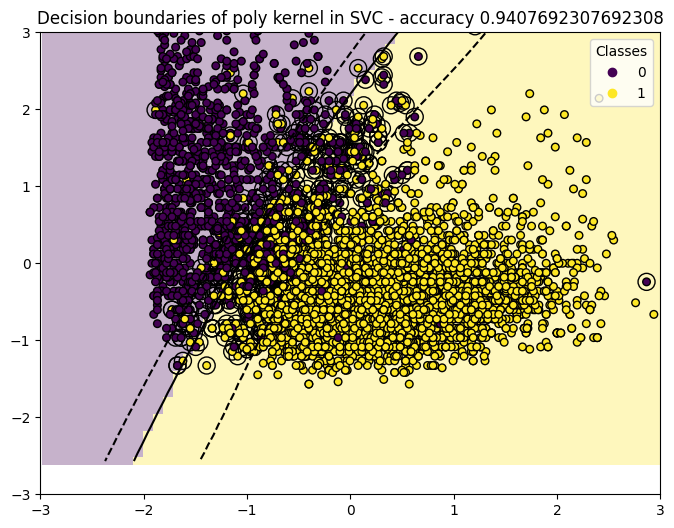

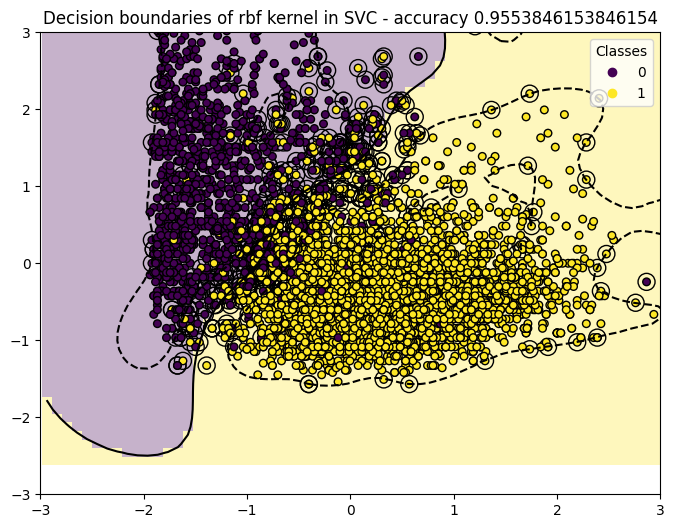

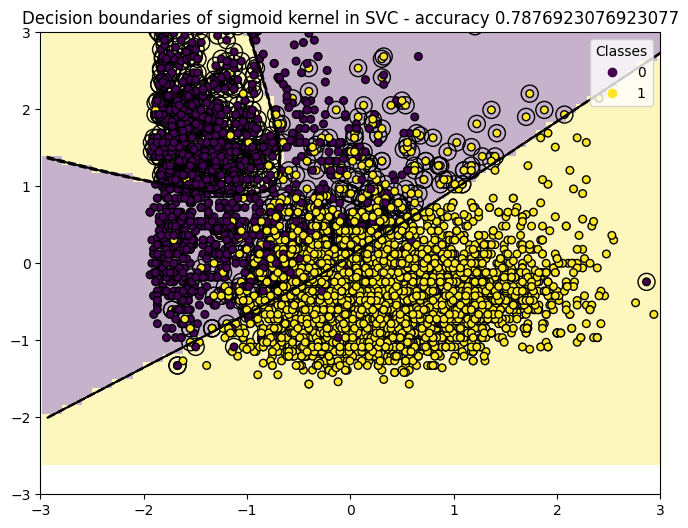

In [420]:
for function in kernel_functions:
    plot_training_data_with_decision_boundary(kernel=function, X=X_train_scaled, y=y_train)

I used the implementation of the Scikit-Learn representation of the decision boundaries and got the following results:
* Linear Kernel presented a linear decision boundary, which is exactly what was expected. Also, it has the support vectors parallel lines, with the most optimal margin size.
* Polynomial Kernel, presented a polynomial decision boundary, with support vectors that are bending accordingly.
* Gaussian (RBF) Kernel, which performed the best and managed to provide a better decision boundary, that captures well the data points, by making the decision boundaries separately on clusters of data points of the same class.
* Sigmoid Kernel, performed the worst, and, as discussed in the documentation, it tries to make the decision boundary the same as the sigmoid curve, which leads to misclassifying data, as it may be seen in the above cluster of data points, which were captured wrongly.